# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [ ]:
import torch

In [ ]:
torch.__version__

'2.0.1+cu118'

### 초기화 되지 않은 행렬

In [ ]:
x = torch.empty(4, 2)
print(x)

tensor([[ 2.9757e+35,  4.5893e-41],
        [-3.2569e+17,  3.1438e-41],
        [ 1.8510e+35,  4.5893e-41],
        [-6.7772e-23,  4.5891e-41]])


### 무작위로 초기화된 행렬

In [ ]:
x = torch.rand(4, 2)
print(x)

tensor([[0.0555, 0.6627],
        [0.0251, 0.1577],
        [0.6159, 0.1492],
        [0.9911, 0.0041]])


### dtype이 long, 0으로 채워진 텐서

In [ ]:
x = torch.zeros(4, 2, dtype=torch.long)
print(x, type(x))

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]]) <class 'torch.Tensor'>


In [ ]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [ ]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [ ]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[ 0.0636, -0.6072, -1.7674, -0.0962],
        [ 0.5513,  0.3221, -2.1362,  0.4563]])


### 텐서의 크기

In [ ]:
print(x.size())

torch.Size([2, 4])


## 텐서의 연산(operations)

### 덧셈 1

In [ ]:
print(x)

tensor([[ 0.0636, -0.6072, -1.7674, -0.0962],
        [ 0.5513,  0.3221, -2.1362,  0.4563]])


In [ ]:
y = torch.rand(2, 4)
print(y)
print(x + y)

tensor([[0.0273, 0.3294, 0.7460, 0.5285],
        [0.1940, 0.4834, 0.9073, 0.2317]])
tensor([[ 0.0908, -0.2777, -1.0215,  0.4323],
        [ 0.7453,  0.8055, -1.2290,  0.6880]])


### 덧셈2

In [ ]:
print(torch.add(x, y))

tensor([[ 0.0908, -0.2777, -1.0215,  0.4323],
        [ 0.7453,  0.8055, -1.2290,  0.6880]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [ ]:
result = torch.empty(2,4)
print(result)
torch.add(x, y, out=result)
print(result)

tensor([[ 2.9757e+35,  4.5893e-41,  2.9757e+35,  4.5893e-41],
        [ 7.4528e-01,  8.0550e-01, -1.2290e+00,  6.8798e-01]])
tensor([[ 0.0908, -0.2777, -1.0215,  0.4323],
        [ 0.7453,  0.8055, -1.2290,  0.6880]])


### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [ ]:
print(x)
print(y)
y.add_(x) # y += x
print(y)

tensor([[ 0.0636, -0.6072, -1.7674, -0.0962],
        [ 0.5513,  0.3221, -2.1362,  0.4563]])
tensor([[0.0273, 0.3294, 0.7460, 0.5285],
        [0.1940, 0.4834, 0.9073, 0.2317]])
tensor([[ 0.0908, -0.2777, -1.0215,  0.4323],
        [ 0.7453,  0.8055, -1.2290,  0.6880]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [ ]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])

print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [ ]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])

print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [ ]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])

print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [ ]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])

print(torch.mm(x, y))
print(x.mm(y))

tensor([[20., 28.],
        [52., 76.]])
tensor([[20., 28.],
        [52., 76.]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [ ]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [ ]:
print(x[:, 1])

tensor([3., 7.])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [ ]:
import torch
x = torch.randn(4, 5)
y = x.view(20)
z = x.view(5, -1)
print(x)
print(y)
print(z)
print(x.size())
print(y.size())
print(z.size())

tensor([[-0.0061, -0.2091, -1.0473,  1.4691,  0.2682],
        [-1.4922, -0.5424, -1.0251, -0.1504, -1.3749],
        [-0.5333,  1.0363, -0.4002, -0.1620, -0.5338],
        [ 1.1347, -0.6751, -1.6899, -0.0879,  0.9439]])
tensor([-0.0061, -0.2091, -1.0473,  1.4691,  0.2682, -1.4922, -0.5424, -1.0251,
        -0.1504, -1.3749, -0.5333,  1.0363, -0.4002, -0.1620, -0.5338,  1.1347,
        -0.6751, -1.6899, -0.0879,  0.9439])
tensor([[-0.0061, -0.2091, -1.0473,  1.4691],
        [ 0.2682, -1.4922, -0.5424, -1.0251],
        [-0.1504, -1.3749, -0.5333,  1.0363],
        [-0.4002, -0.1620, -0.5338,  1.1347],
        [-0.6751, -1.6899, -0.0879,  0.9439]])
torch.Size([4, 5])
torch.Size([20])
torch.Size([5, 4])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.5401])
-0.5400684475898743
torch.float32


- 스칼라값 하나만 존재해야함

In [ ]:
x = torch.randn(2)
print(x)
print(x.item())
print(x.dtype)

tensor([ 1.1758, -0.4576])


RuntimeError: ignored

### squeeze
- 차원을 축소(제거)

In [ ]:
tensor = torch.randn(1, 3, 3)
print(tensor)
print(tensor.shape)

t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[[ 0.3751, -1.0941,  0.4370],
         [ 0.1747, -0.2088, -0.0907],
         [ 0.3314, -0.4455,  1.5091]]])
torch.Size([1, 3, 3])
tensor([[ 0.3751, -1.0941,  0.4370],
        [ 0.1747, -0.2088, -0.0907],
        [ 0.3314, -0.4455,  1.5091]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [ ]:
tensor = torch.randn(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[ 0.0571,  2.1504, -0.9769],
         [ 0.7452, -0.6294, -0.4922],
         [ 0.0072,  0.3992, -0.3452]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.unsqueeze(dim=0)
print(t)
print(t.shape)

tensor([[[[ 0.0571,  2.1504, -0.9769],
          [ 0.7452, -0.6294, -0.4922],
          [ 0.0072,  0.3992, -0.3452]]]])
torch.Size([1, 1, 3, 3])


### stack
- 텐서간 결합

In [ ]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [ ]:
a = torch.randn(1, 1, 3, 3)
b = torch.randn(1, 1, 3, 3)
c = torch.cat((a, b), dim=0)

print(c)
print(c.size())

tensor([[[[-0.6610,  0.7429,  0.4477],
          [ 0.6997, -1.7418, -0.8348],
          [-0.0992,  1.0300,  0.4424]]],


        [[[ 1.8317,  0.8522,  2.4130],
          [ 1.5270,  1.2365,  0.7186],
          [ 0.9873, -0.8045,  0.5476]]]])
torch.Size([2, 1, 3, 3])


In [ ]:
a = torch.randn(1, 3, 3)
b = torch.randn(1, 3, 3)
c = torch.cat((a, b), dim=1)

print(c)
print(c.size())

tensor([[[-1.6235e+00, -8.3796e-01, -1.7503e-01],
         [ 4.5498e-01, -5.9064e-01,  4.1694e-04],
         [ 1.7554e-01, -8.4472e-01, -2.2503e-01],
         [ 3.9018e-01, -4.3199e-04,  2.8286e-01],
         [ 4.5998e-01,  5.5924e-01,  1.1725e+00],
         [ 2.2505e+00,  1.0614e-01, -2.0338e-01]]])
torch.Size([1, 6, 3])


### chuck
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [ ]:
tensor = torch.rand(3, 6)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1) # 하나의 텐서를 몇 개로 나눌 것인가!

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.2223, 0.4917, 0.2450, 0.6002, 0.5194, 0.1496],
        [0.2730, 0.5690, 0.8930, 0.7967, 0.3982, 0.4634],
        [0.8697, 0.6646, 0.3286, 0.1739, 0.0152, 0.0274]])
tensor([[0.2223, 0.4917],
        [0.2730, 0.5690],
        [0.8697, 0.6646]])
tensor([[0.2450, 0.6002],
        [0.8930, 0.7967],
        [0.3286, 0.1739]])
tensor([[0.5194, 0.1496],
        [0.3982, 0.4634],
        [0.0152, 0.0274]])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [ ]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim=1) # 나눠진 하나의 텐서의 크기가 몇이냐!

print(tensor)
print(t1)
print(t2)

tensor([[0.3533, 0.3500, 0.1734, 0.9031, 0.9187, 0.5013],
        [0.2316, 0.3481, 0.1255, 0.6775, 0.5018, 0.0075],
        [0.1373, 0.5003, 0.6924, 0.7716, 0.3058, 0.5276]])
tensor([[0.3533, 0.3500, 0.1734],
        [0.2316, 0.3481, 0.1255],
        [0.1373, 0.5003, 0.6924]])
tensor([[0.9031, 0.9187, 0.5013],
        [0.6775, 0.5018, 0.0075],
        [0.7716, 0.3058, 0.5276]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [ ]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# 메모리가 공유된 형태이기에 변환
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [ ]:
# 메모리가 공유된 형태이기에 변환
import numpy as np
a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [ ]:
import torch

In [ ]:
x = torch.rand(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.9749])
0.9748744964599609
torch.float32


In [83]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 디바이스 지정
y = torch.ones_like(x, device=device)
x = x.to(device) # gpu 환경으로 옮기겠다!
z = x + y
print(device)
print(z)
print(z.to("cpu", torch.double)) # 디바이스는 사라지고, 데이터타입만 남는다.

NameError: ignored

## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [ ]:
import torch

In [ ]:
x = torch.ones(3, 3, requires_grad = True) # 해당 텐서에서 이루어지는 모든 연산들을 추적
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x + 5
print(y) # grad_fn에 addbackward : 추적 가능하기에 backward로 gradient 계산가능, 아래 grad 속성에 누적

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
print(y.grad_fn) # 백워드할 수 있는 하나가 붙었다.

In [ ]:
z = y*y*2
out = z.mean()
print(z, out) # 곱, 평균에 대한 backward가 붙었다.

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [ ]:
a = torch.randn(3, 3)
a = ((a*3) / (a-1))
print(a.requires_grad)

a.requires_grad_(True) # 추적 시작
print(a.requires_grad)

b = (a*a).sum()
print(b.grad_fn) # sumbackward가 붙었다.

False
True


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [ ]:
out.backward()

In [ ]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [ ]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
  y = y * 2

print(y)

tensor([-678.5838,  432.2754,  635.8265], grad_fn=<MulBackward0>)


In [ ]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [ ]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [ ]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [ ]:
import torch

In [ ]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print("a.data:", a.data)
print("a.grad:", a.grad) # 아직 아무 계산을 하지 않음
print("a.grad_fn:", a.grad_fn) # a는 초기값이기에 아무 첨가를 하지 않음

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: None
a.grad_fn: None


- $b = a + 2$

In [ ]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$

In [ ]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [ ]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [ ]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [ ]:
print("a.data:", a.data)
print("a.grad:", a.grad) # 1 * 2b * 1 => 2a + 4 => [[2,2],[2,2]] + 4 => a.grad = [[6,6],[6,6]]
print("a.grad_fn:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


In [ ]:
print("b.data:", b.data)
print("b.grad:", b.grad)
print("b.grad_fn:", b.grad_fn)
# 반면 계산 중간 과정인 y, z의 경우 실제 grad가 저장되진 않고 backward 연산에만 참여된 것으로 볼 수 있습니다. 그 결과 y.grad, z.grad는 None이 됩니다.

b.data: tensor([[3., 3.],
        [3., 3.]])
b.grad: None
b.grad_fn: <AddBackward0 object at 0x7bbbf4dbf5b0>


<ipython-input-92-403b26da0b13>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("b.grad:", b.grad)


In [ ]:
print("c.data:", c.data)
print("c.grad:", c.grad)
print("c.grad_fn:", c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]])
c.grad: None
c.grad_fn: <PowBackward0 object at 0x7bbb2562f8b0>


<ipython-input-93-035c04ca563a>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("c.grad:", c.grad)


In [ ]:
print("out.data:", out.data)
print("out.grad:", out.grad)
print("out.grad_fn:", out.grad_fn)

out.data: tensor(36.)
out.grad: None
out.grad_fn: <SumBackward0 object at 0x7bbb2562eb30>


<ipython-input-94-cabb8f7e327b>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("out.grad:", out.grad)


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [ ]:
x = torch.ones(3, requires_grad=True)
y = (x**2)
z = y ** 2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [ ]:
grad = torch.Tensor([0.1,1 , 100])
z.backward(grad)

In [ ]:
print("x.data:", x.data)
print("x.grad:", x.grad)
print("x.grad_fn:", x.grad_fn)

x.data: tensor([1., 1., 1.])
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn: None


In [ ]:
print("y.data:", y.data)
print("y.grad:", y.grad)
print("y.grad_fn:", y.grad_fn)

y.data: tensor([1., 1., 1.])
y.grad: None
y.grad_fn: <PowBackward0 object at 0x7bbbf416bf10>


<ipython-input-98-b63d98fcbc02>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("y.grad:", y.grad)


In [ ]:
print("z.data:", z.data)
print("z.grad:", z.grad)
print("z.grad_fn:", z.grad_fn)

z.data: tensor([2., 2., 2.])
z.grad: None
z.grad_fn: <AddBackward0 object at 0x7bbbe7f2dfc0>


<ipython-input-99-e6bf01067a56>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("z.grad:", z.grad)


앞에서 다룬 모든 예제는 gradient를 구하기 위해서 tensor의 속성을 requires_grad = True로 설정하였습니다.

gradient를 구한다는 것은 학습 대상이 되는 weight 입니다.

반면 학습이 모두 끝나고 학습한 결과를 실행에 옮기는 inference 단계에서는 굳이 학습 모드로 사용할 필요가 없습니다.

이 때, 사용하는 것이 torch.no_grad() 입니다. torch.no_grad()가 적용된 tensor는 비록 실제 속성은 requires_grad = True 이더라도 gradient를 업데이트 하지 않고, dropout, batchnormalization 등이 적용되지 않습니다.

In [ ]:
x = torch.tensor(1.0, requires_grad = True)
print(x.requires_grad)
# True

with torch.no_grad():
    print(x.requires_grad)
    print((x**2).requires_grad)
# True
# False

print(x.requires_grad)
# True

True
True
False
True


위 예제를 살펴보면 with torch.no_grad(): 에서 requires_grad = True인 tensor가 어떤 연산이 적용될 때, requires_grad = False로 변경된 것을 확인할 수 있습니다.

그리고 with 문을 벗어나면 다시 requires_grad = True로 원복된 것을 확인하실 수 있습니다.

이러한 방식으로 gradient를 업데이트 하는 모드와 그렇지 않은 모드를 구분하실 수 있습니다.

---

## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능



### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [1]:
import torch
import torch.nn as nn

- Convolution Layer 예시 (1)


In [5]:
m = nn.Conv2d(16, 33, 3, stride=2) # 3x3

m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2)) # 3x5

m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1)) # 패딩 사이의 간격 (3,1)

input = torch.randn(20, 16, 50, 100)
print(input)
output = m(input)
print(output)

tensor([[[[-3.3631e-01, -1.2727e-02,  2.9175e-01,  ..., -1.5597e+00,
            1.6607e+00,  2.0624e+00],
          [-7.1945e-01,  1.8685e-01,  1.1920e+00,  ...,  8.6475e-01,
            5.3100e-01, -6.2879e-01],
          [-1.6749e+00,  7.0592e-01, -1.5127e-01,  ..., -1.8565e-01,
           -7.4226e-01,  2.0691e+00],
          ...,
          [-6.3433e-02, -1.2459e-01, -1.8907e-02,  ...,  1.7009e+00,
           -1.1733e+00, -1.2789e+00],
          [-3.9047e-01, -1.4629e+00,  1.2274e+00,  ..., -3.7474e-01,
           -1.0354e+00,  6.5692e-02],
          [ 9.9085e-02, -4.5091e-01,  2.2547e-01,  ..., -2.4079e-01,
           -9.6508e-01, -1.0192e+00]],

         [[ 1.2652e+00,  4.4094e-01,  5.6277e-01,  ..., -1.9413e+00,
           -9.2454e-02, -1.4988e-01],
          [ 1.6373e+00,  3.5209e-01, -1.6991e+00,  ...,  7.7530e-01,
            6.9889e-01,  4.4981e-01],
          [ 2.1050e-01,  2.0509e-01,  1.7848e-01,  ..., -9.5122e-01,
           -4.1044e-01, -8.3663e-01],
          ...,
     

In [4]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [6]:
import torch
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [7]:
filters = torch.randn(8, 4, 3, 3)

In [8]:
inputs = torch.randn(1, 4, 5, 5)
conv = F.conv2d(inputs, filters, padding=1)

conv.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [20]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [21]:
transform  = transforms.Compose([transforms.ToTensor(),
                                  transforms.Normalize(mean=(0.5,), std=(0.5,))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [22]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [23]:
trainset = torchvision.datasets.MNIST(root='/content',
                                      train=True,
                                      download=True,
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='/content',
                                      train=False,
                                      download=True,
                                      transform=transform)


100%|██████████| 9912422/9912422 [00:00<00:00, 94144059.45it/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 15552149.68it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26932090.02it/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2329200.24it/s]


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [38]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [39]:
dataiter = next(iter(train_loader))
images, labels = dataiter
print(images.shape, labels.shape)


torch.Size([8, 1, 28, 28]) torch.Size([8])


<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [40]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-40-60d85d81d40e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [41]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [42]:
image = torch_image.numpy()
image.shape

(28, 28)

In [43]:
label = labels[0].numpy()
label.shape

()

In [44]:
label

array(6)

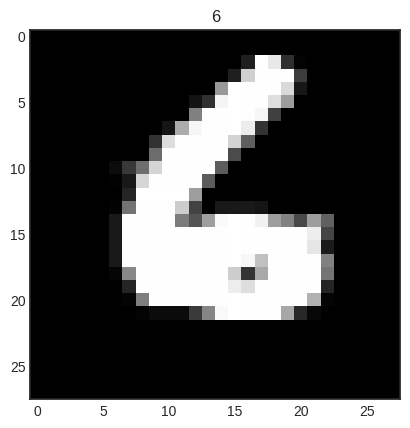

In [46]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

## 각 Layer 설명

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [48]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [50]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `wegiht`확인

In [51]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [52]:
weight = weight.detach()

In [53]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

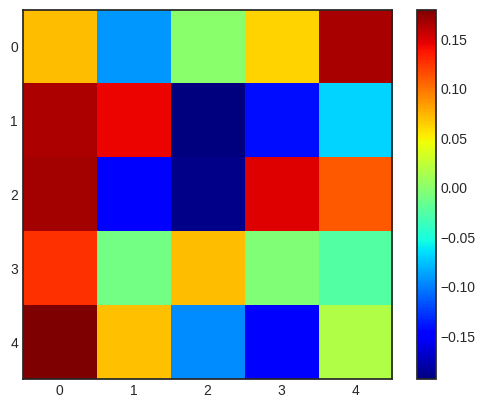

In [54]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [55]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [56]:
input_image = torch.unsqueeze(images[0], dim=0)

In [57]:
output_data = layer(input_image)

In [58]:
output = output_data.data

In [59]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

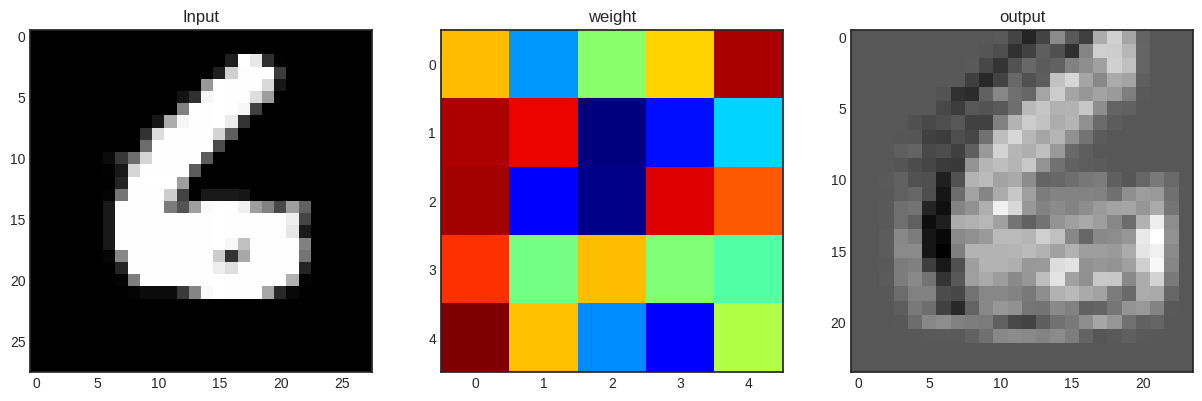

In [60]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title('weight')
plt.imshow(weight[0,0,:,:] ,'jet')
plt.subplot(133)
plt.title('output')
plt.imshow(output_arr[0,0,:,:], 'gray')
plt.show()

### Pooling
- `F.max_pool2d`
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [61]:
image.shape

(28, 28)

In [62]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [64]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

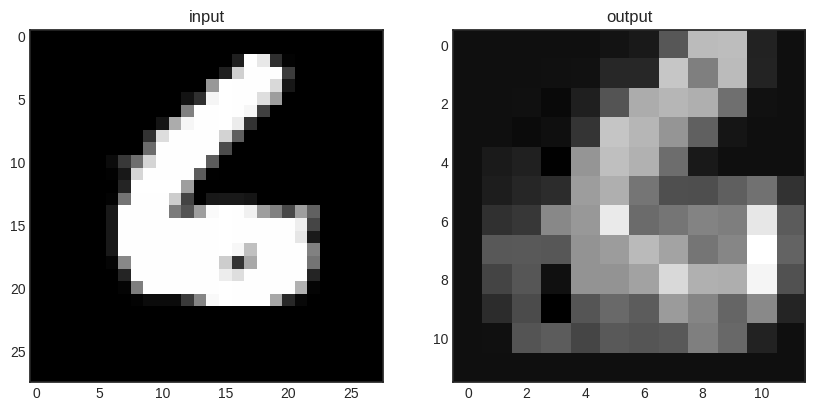

In [67]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title('input')
plt.imshow(image, 'gray')
plt.subplot(122)
plt.title('output')
plt.imshow(pool_arr[0,0,:,:], 'gray')
plt.show()

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [68]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [69]:
flatten = image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [70]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [71]:
lin

tensor([[-0.4095,  0.7190,  0.8133,  0.2615, -0.2189,  0.4982, -0.2268, -0.1998,
         -0.0934,  0.5858]], grad_fn=<AddmmBackward0>)

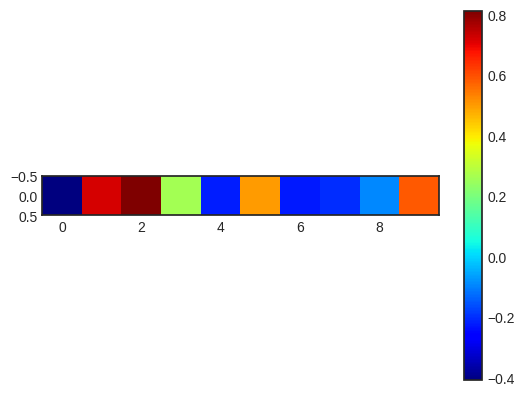

In [73]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Softmax

In [74]:
with torch.no_grad():
  flatten = image.view(1, 28*28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

In [75]:
softmax

tensor([[0.1179, 0.0499, 0.0923, 0.2128, 0.0249, 0.0880, 0.1184, 0.0911, 0.1566,
         0.0482]])

In [81]:
import numpy as np
np.sum(softmax.numpy())

1.0

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [84]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [85]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [86]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

